# Functions

In [39]:
%load_ext autoreload
%reload_ext autoreload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
def overview_plot(df, plot_dict, suptitle, time_range=None, figsize=(12, 20)):
    """
    Generates an overview plot with multiple subplots based on the provided data and plot configuration.
    Parameters:
    df (pandas.DataFrame): The data frame containing the data to be plotted. It must include a 'time_seconds' column.
    plot_dict (dict): A dictionary where keys are subplot titles and values are lists of column names to be plotted in each subplot.
    suptitle (str): The main title for the entire figure.
    time_range (tuple, optional): A tuple specifying the start and end time in seconds to filter the data. Defaults to None.
    figsize (tuple, optional): A tuple specifying the size of the figure. Defaults to (12, 20).
    Returns:
    None
    """

    # Set the font to Times New Roman
    plt.rcParams["font.family"] = "Times New Roman"
    
    # Create a figure and a set of subplots
    fig, axes = plt.subplots(len(plot_dict), 1, figsize=figsize, sharex=True)
    
    if len(plot_dict) == 1:
        axes = [axes]  # Ensure axes is iterable if there's only one subplot

    # Add a suptitle to the figure
    fig.suptitle(suptitle, fontsize=16)

    # Apply time range if specified
    if time_range:
        df = df[(df['time_seconds'] >= time_range[0]) & (df['time_seconds'] <= time_range[1])]

    for ax, (title, columns) in zip(axes, plot_dict.items()):
        for column in columns:
            ax.scatter(df['time_seconds'], df[column], label=column.replace('_', ' '), marker='.')

        # Set the title of the subplot
        ax.set_title(title)

        # Add y-axis units based on specific strings in the title
        if 'Torque' in title:
            ax.set_ylabel('[Nm]')
        elif 'Force' in title:
            ax.set_ylabel('[N]')
        elif 'Velocity' in title:
            ax.set_ylabel('[m/s]' if 'Track' in title else '[rad/s]')
        elif 'angle' in title:
            ax.set_ylabel('[rad]')
        else:
            ax.set_ylabel('')
        
        if 'Track Velocity' in title:
            ax.set_ylim(-32, 2)
        # if 'Tail Torque' in title:
        #     ax.set_ylim(-200, 200)
        # if 'Torques on Body' in title:
        #     ax.set_ylim(-2, 2)

        # Add legend to the subplot
        ax.legend()
        ax.grid()

    # Set the x-axis label
    axes[-1].set_xlabel('Time [s]')

    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust rect to make room for suptitle
    plt.show()

from matplotlib.ticker import ScalarFormatter

def plot_Drag_contribution(df_wForce, df_woForce, columns_to_plot, legend, suptitle, columns_to_plot2=None, time_range=None, figsize=(12, 18)):
    """
    This function creates a figure with multiple subplots.
    
    Pseudocode:
    - check if 'columns_to_plot2' is provided;
        - if yes: check that keys of 'columns_to_plot' and 'columns_to_plot2' are the same (assertion error)
        - if no: copy 'columns_to_plot' to 'columns_to_plot2'
    
    For each key in 'columns_to_plot' create a subplot which plots;
    - columns defined in 'columns_to_plot' for 'df_wForce'
    - columns defined in 'columns_to_plot2' for 'df_woForce'

    Labels:
    - For plots from 'df_wForce': use the list of labels found at 'legend[key]' where 'key' is the key in 'columns_to_plot'. Be sure to append ' (with Wind)'.
    - For plots from 'df_woForce': use the list of labels found at 'legend[key]' where 'key' is the key in 'columns_to_plot2'. Be sure to append ' (without Wind)'.
    
    Args:
    - df_wForce (pd.DataFrame): dataframe with forces applied (requires column 'time_seconds')
    - df_woForce (pd.DataFrame): dataframe with forces not applied (requires column 'time_seconds')
    - columns_to_plot (dict): contains as keys the subplot-titles and as values a list of columns to plot
    - columns_to_plot2 (dict): defaults to '{}'. If provided, the 'columns_to_plot' only applies to 'df_wForce' and 'columns_to_plot2' to 'df_woForce'
    - legend (dict): contains same keys as the 'columns_to_plot', values is a list of labels to use
    - suptitle (str): main title for the entire figure
    - time_range: tuple with start and end time, if empty, the entire simulation time is used
    - figsize: tuple with figure size
    """
    
    # Set the font to Times New Roman
    plt.rcParams["font.family"] = "Times New Roman"
    # Increase font size
    plt.rcParams.update({'font.size': 14})
    
    # Check if 'columns_to_plot2' is provided
    if columns_to_plot2:
        assert columns_to_plot.keys() == columns_to_plot2.keys(), "Keys of 'columns_to_plot' and 'columns_to_plot2' must be the same"
    else:
        columns_to_plot2 = columns_to_plot.copy()
    
    # Apply time range if specified
    if time_range:
        df_wForce = df_wForce[(df_wForce['time_seconds'] >= time_range[0]) & (df_wForce['time_seconds'] <= time_range[1])]
        df_woForce = df_woForce[(df_woForce['time_seconds'] >= time_range[0]) & (df_woForce['time_seconds'] <= time_range[1])]

    # Create a figure and a set of subplots
    fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=figsize, sharex=True)
    
    if len(columns_to_plot) == 1:
        axes = [axes]  # Ensure axes is iterable if there's only one subplot

    # Add a suptitle to the figure
    fig.suptitle(suptitle, fontsize=22)

    for ax, (title, columns) in zip(axes, columns_to_plot.items()):
        # Plot columns from df_wForce
        for column, label in zip(columns, legend[title]):
            ax.scatter(df_wForce['time_seconds'], df_wForce[column], label=f"{label} (with Wind)", marker='o', s=5, color='orange')

        # Plot columns from df_woForce
        for column, label in zip(columns_to_plot2[title], legend[title]):
            ax.scatter(df_woForce['time_seconds'], df_woForce[column], label=f"{label} (without Wind)", marker='o', s=5, alpha=0.7, color='forestgreen')
        
        # Set the title of the subplot
        ax.set_title(title)

        # Set y-axis formatter to ScalarFormatter to avoid scientific notation
        ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

        # Add legend to the subplot
        ax.legend()
        ax.grid()

    # Set the x-axis label
    axes[-1].set_xlabel('Time [s]')

    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust rect to make room for suptitle
    plt.show()

# Debug

## FF Approach

Index(['time_seconds', 'TailDrive_friction', 'TailDrive_damping',
       'TailDrive_stiffness', 'TailDrive_position_setpoint',
       'TailDrive_velocity_setpoint', 'TailDrive_effort_setpoint',
       'TailDrive_effort_measured', 'TailDrive_effort_applied',
       'TailDrive_position', 'TailDrive_velocity', 'TrackDrive_friction',
       'TrackDrive_damping', 'TrackDrive_stiffness',
       'TrackDrive_position_setpoint', 'TrackDrive_velocity_setpoint',
       'TrackDrive_effort_setpoint', 'TrackDrive_effort_measured',
       'TrackDrive_effort_applied', 'TrackDrive_position',
       'TrackDrive_velocity', 'Track_position_x', 'Track_position_y',
       'Track_position_z', 'Track_velocity_x', 'Track_velocity_y',
       'Track_velocity_z', 'Track_acceleration_x', 'Track_acceleration_y',
       'Track_acceleration_z', 'Track_angular_velocity_x',
       'Track_angular_velocity_y', 'Track_angular_velocity_z',
       'Track_angular_acceleration_x', 'Track_angular_acceleration_y',
       'Track

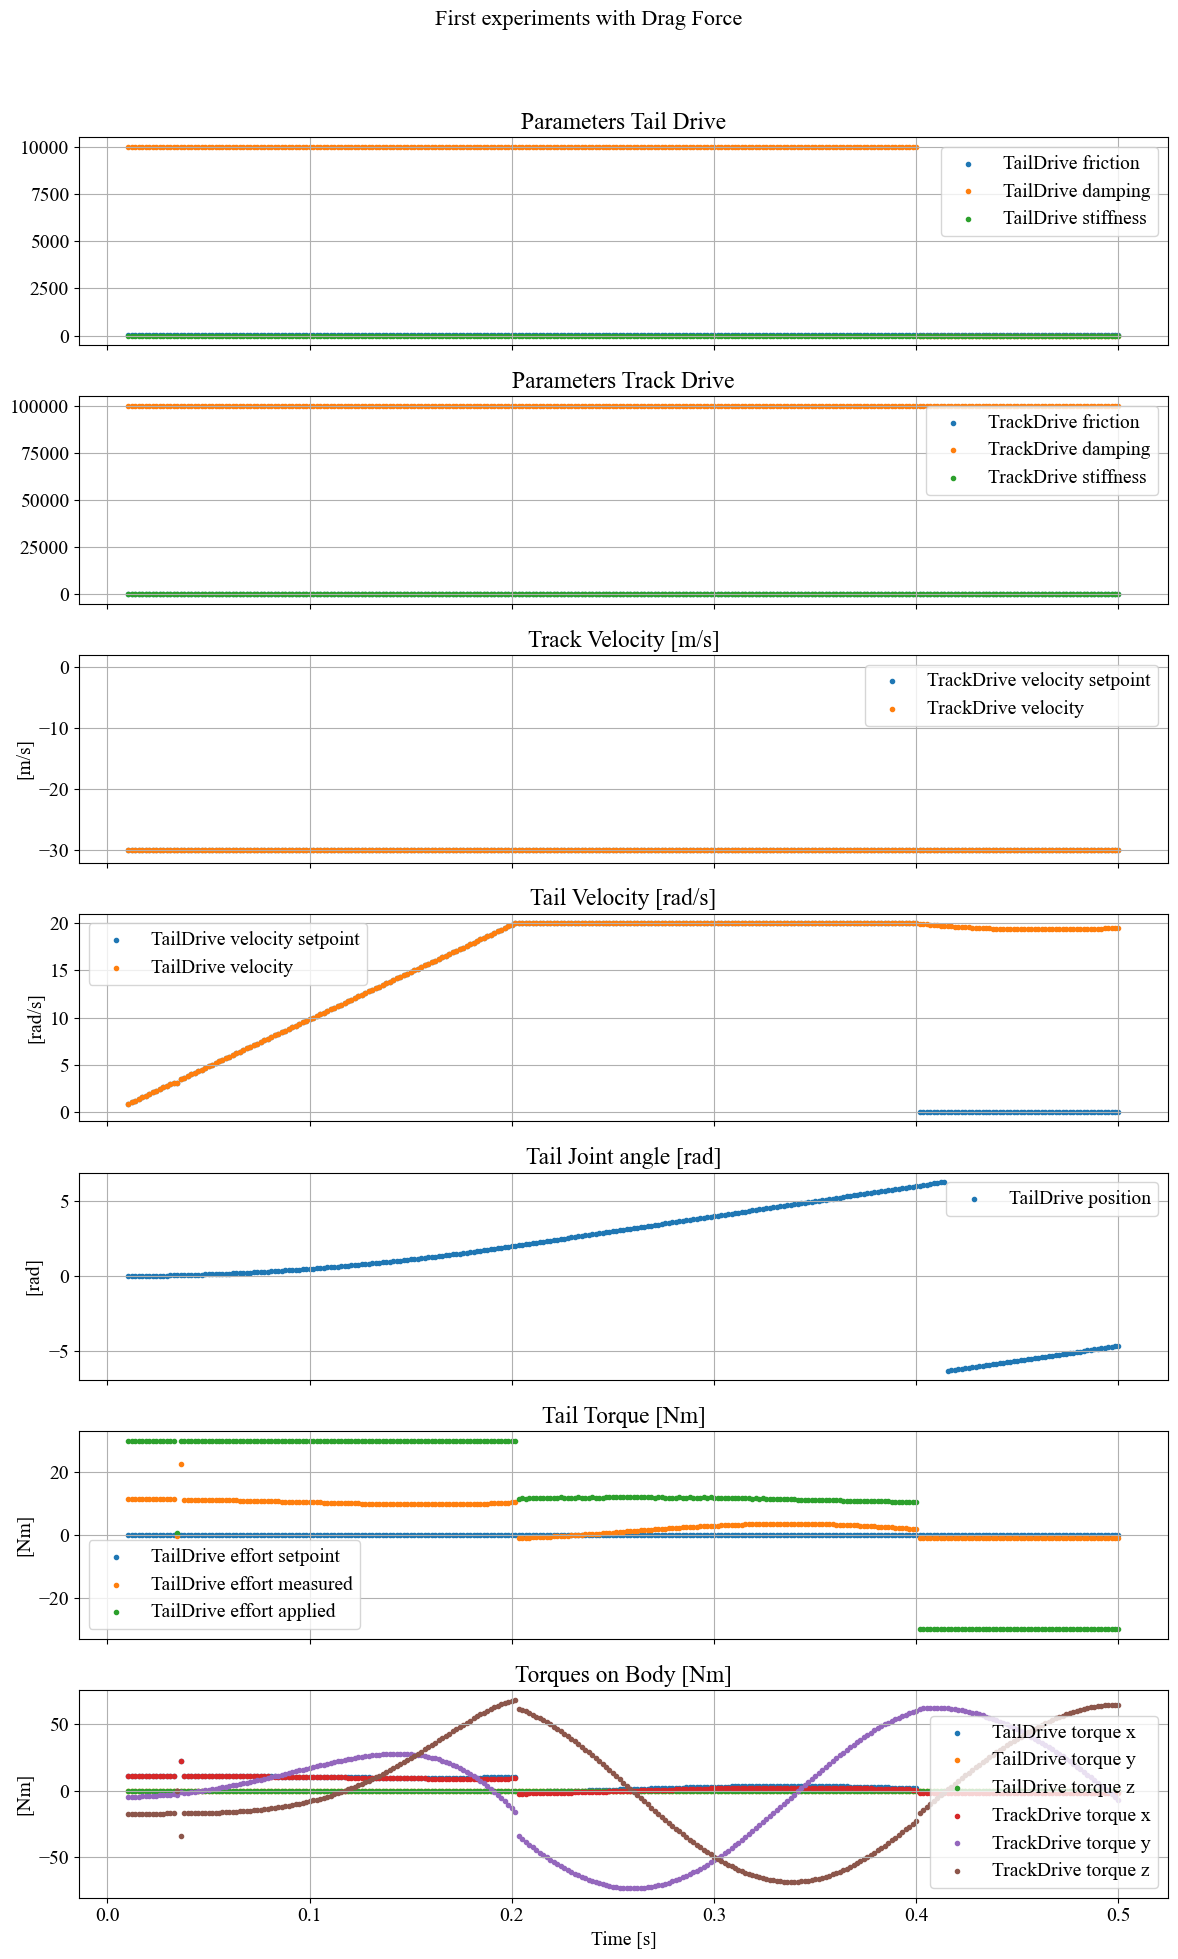

In [46]:
df_ff = pd.read_csv('results/FFDrag_FF_disabled.csv')
stuff_to_plot = {
    "Parameters Tail Drive": ["TailDrive_friction", "TailDrive_damping", "TailDrive_stiffness"],
    "Parameters Track Drive": ["TrackDrive_friction", "TrackDrive_damping", "TrackDrive_stiffness"],
    "Track Velocity [m/s]": ["TrackDrive_velocity_setpoint", "TrackDrive_velocity"],
    "Tail Velocity [rad/s]": ["TailDrive_velocity_setpoint", "TailDrive_velocity"],
    "Tail Joint angle [rad]": ["TailDrive_position"],
    "Tail Torque [Nm]": ["TailDrive_effort_setpoint", "TailDrive_effort_measured", "TailDrive_effort_applied"],
    "Torques on Body [Nm]": ["TailDrive_torque_x", "TailDrive_torque_y", "TailDrive_torque_z", "TrackDrive_torque_x", "TrackDrive_torque_y", "TrackDrive_torque_z"],
}
print(df_ff.columns)
overview_plot(df_ff, stuff_to_plot, "First experiments with Drag Force", time_range=(0.01, 1))

## Analytical Approach

Index(['time_seconds', 'Wind torque magnitude', 'F_sub_x', 'F_sub_y',
       'F_sub_z', 'F_total', 'F_applied?', 'A_tilde', 'Wind_x', 'Wind_y',
       'Wind_z', 'TailDrive_friction', 'TailDrive_damping',
       'TailDrive_stiffness', 'TailDrive_position_setpoint',
       'TailDrive_velocity_setpoint', 'TailDrive_effort_setpoint',
       'TailDrive_effort_measured', 'TailDrive_effort_applied',
       'TailDrive_position', 'TailDrive_velocity', 'Root_Body_position_x',
       'Root_Body_position_y', 'Root_Body_position_z', 'Root_Body_velocity_x',
       'Root_Body_velocity_y', 'Root_Body_velocity_z',
       'Root_Body_acceleration_x', 'Root_Body_acceleration_y',
       'Root_Body_acceleration_z', 'Root_Body_angular_velocity_x',
       'Root_Body_angular_velocity_y', 'Root_Body_angular_velocity_z',
       'Root_Body_angular_acceleration_x', 'Root_Body_angular_acceleration_y',
       'Root_Body_angular_acceleration_z', 'Body_position_x',
       'Body_position_y', 'Body_position_z', 'Body_ve

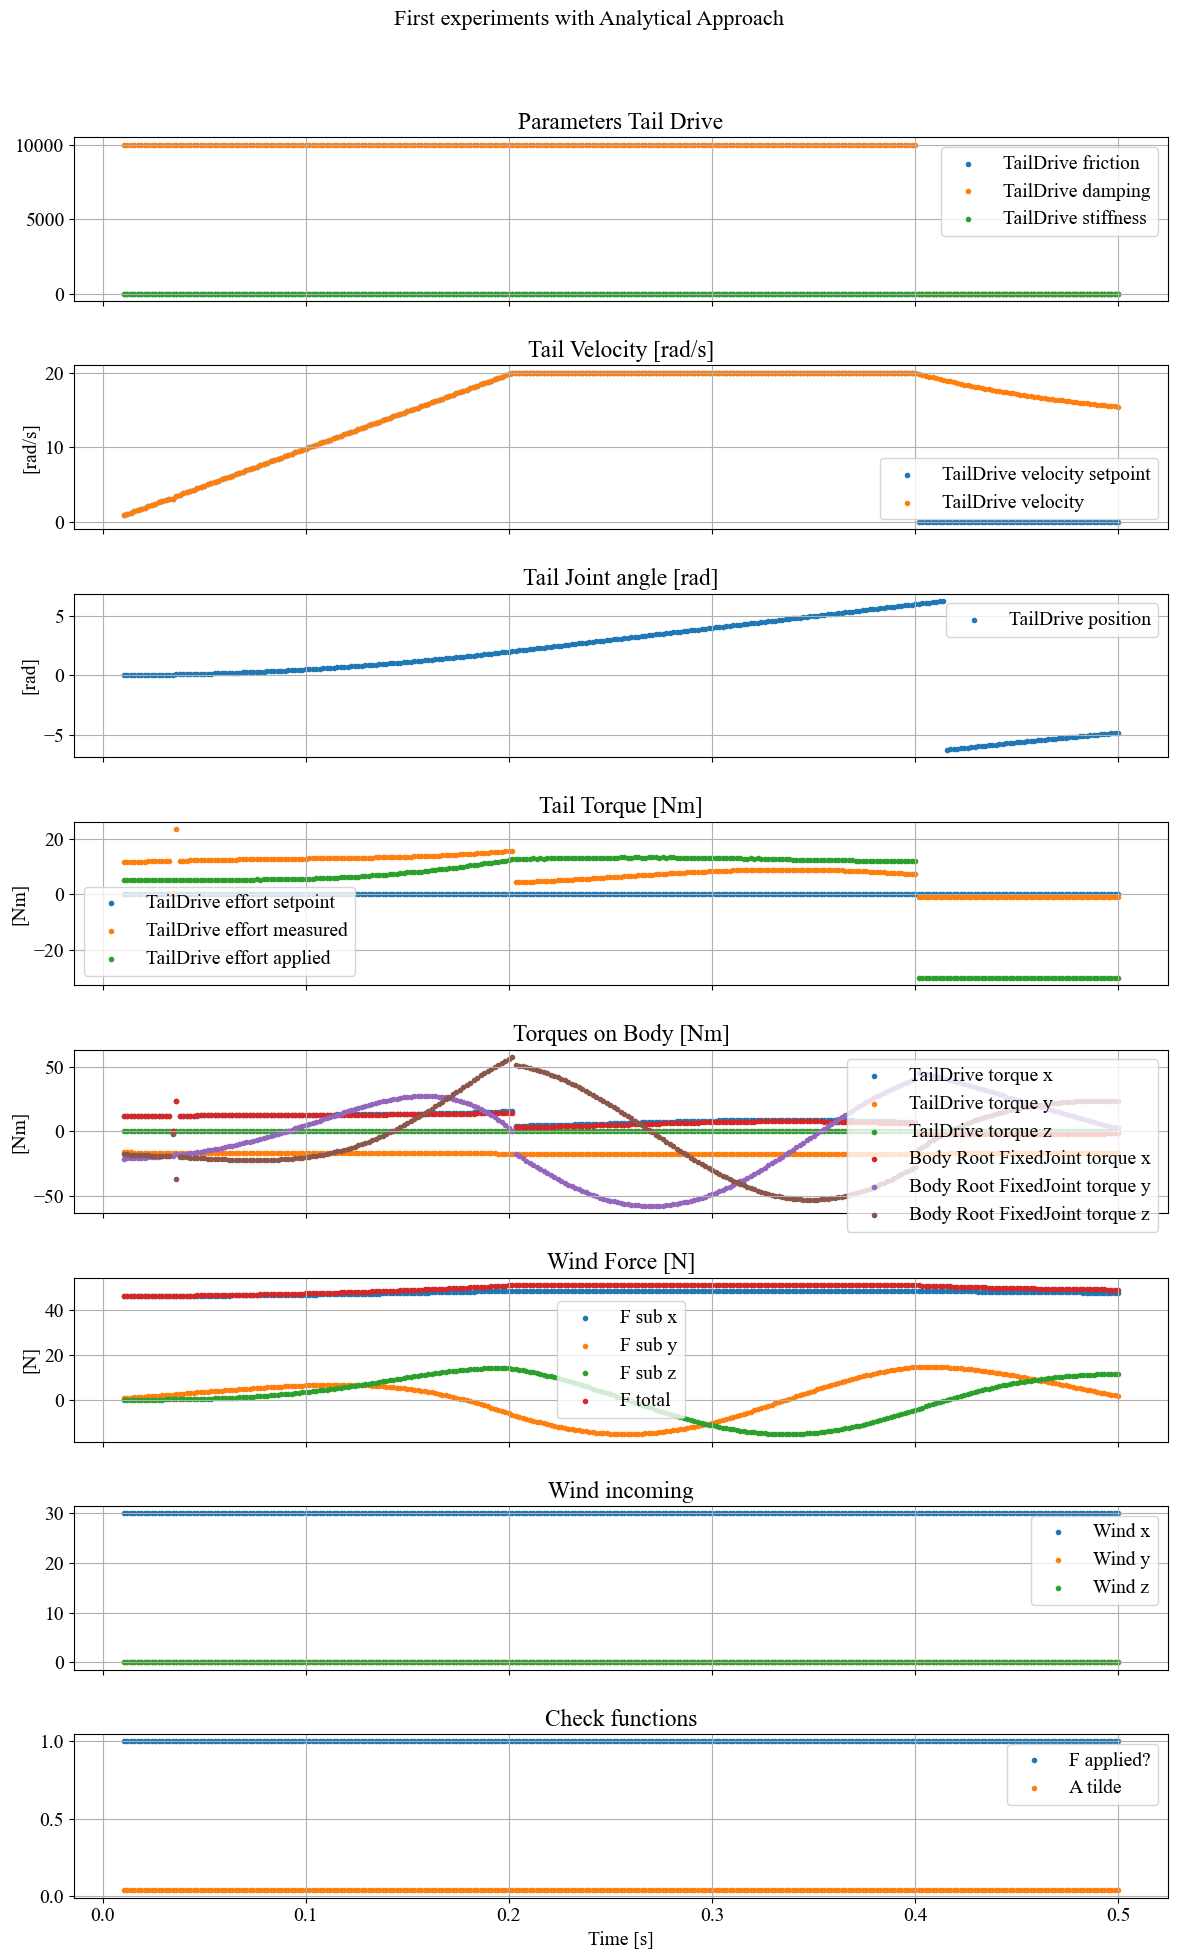

In [45]:
## Analytical Approach
df_an = pd.read_csv('results/AnalyticalApproach_Forces_applied.csv')
stuff_to_plot = {
    "Parameters Tail Drive": ["TailDrive_friction", "TailDrive_damping", "TailDrive_stiffness"],
    "Tail Velocity [rad/s]": ["TailDrive_velocity_setpoint", "TailDrive_velocity"],
    "Tail Joint angle [rad]": ["TailDrive_position"],
    "Tail Torque [Nm]": ["TailDrive_effort_setpoint", "TailDrive_effort_measured", "TailDrive_effort_applied"],
    "Torques on Body [Nm]": ["TailDrive_torque_x", "TailDrive_torque_y", "TailDrive_torque_z", "Body_Root_FixedJoint_torque_x", "Body_Root_FixedJoint_torque_y", "Body_Root_FixedJoint_torque_z"],
    "Wind Force [N]": ["F_sub_x", "F_sub_y", "F_sub_z", "F_total"],
    "Wind incoming": ["Wind_x", "Wind_y", "Wind_z"],
    "Check functions": ["F_applied?", "A_tilde"],
}
print(df_an.columns)
overview_plot(df_an, stuff_to_plot, "First experiments with Analytical Approach", time_range=(0.01, 1))

# Analytical

In [34]:
def some_math_function(df1_wind, df2_noWind):
    column = "Body_Root_FixedJoint_torque_x"
    difference = pd.DataFrame(index=df1_wind.index, data={'time_seconds': df1_wind['time_seconds'], 'with_wind': df1_wind[column], 'without_wind': df2_noWind[column]})
    difference['wind_minus_noWind'] = df1_wind[column] - df2_noWind[column]
    difference['time_seconds'] = df1_wind['time_seconds'].copy()

    # Stats on difference
    print(f"Mean difference: {difference['wind_minus_noWind'].mean()}")
    print(f"Max difference: {difference['wind_minus_noWind'].max()}")
    print(f"Min difference: {difference['wind_minus_noWind'].min()}")

    # Percentage difference where max difference
    # Index where max difference occurs (drop index=125, because autlier!)
    difference = difference.drop(index=125)
    difference = difference.drop(index=228)
    idx = difference['wind_minus_noWind'].idxmax()
    print(f"At max difference (time_seconds={difference['time_seconds'][idx]}), the percentage difference is: {difference['wind_minus_noWind'][idx] / difference['without_wind'][idx] * 100}%")

    fig, ax = plt.subplots(figsize=(12, 6))
    ax.scatter(difference['time_seconds'], difference['wind_minus_noWind'], label='Difference between with and without wind')
    ax.set_title('Difference between with and without wind')
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Difference [Nm]')
    ax.legend()
    ax.grid()

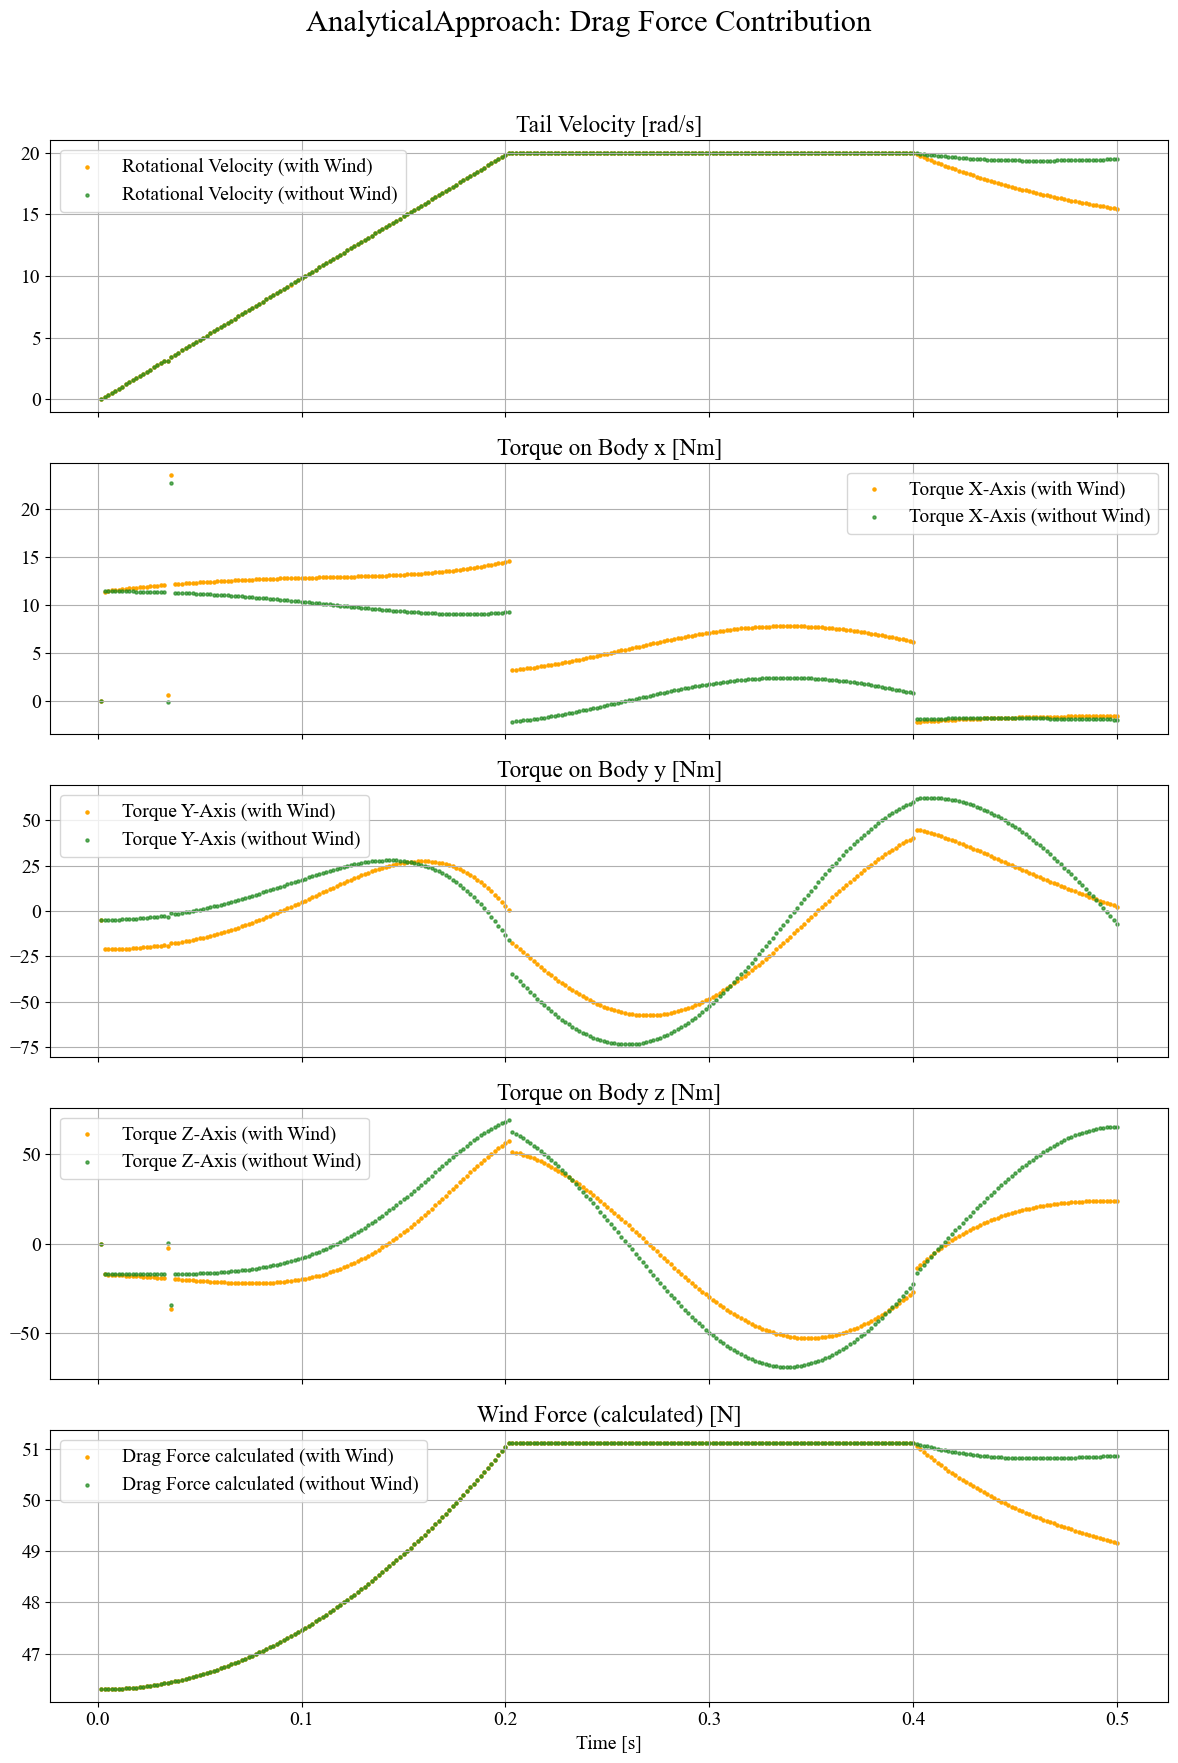

Mean difference: 3.1789183786652724
Max difference: 5.376988887786865
Min difference: -0.28092491626739524
At max difference (time_seconds=0.3741379310344834), the percentage difference is: 292.5641587469989%


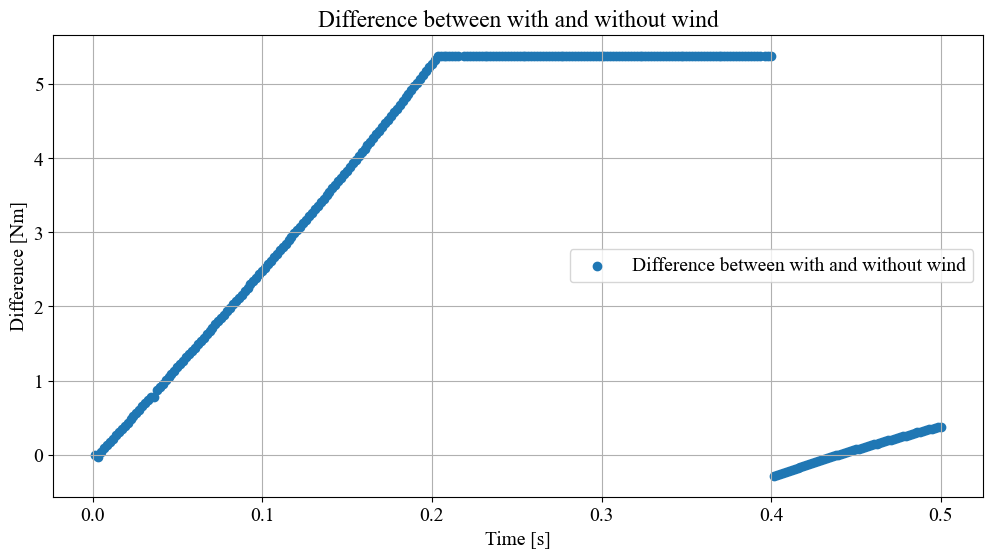

In [35]:
df_analytical_wForce = pd.read_csv('results/AnalyticalApproach_Forces_applied.csv')
df_analytical_woForce = pd.read_csv('results/AnalyticalApproach_Forces_not_applied.csv')

columns_to_plot = {"Tail Velocity [rad/s]": ["TailDrive_velocity"],
                    "Torque on Body x [Nm]": ["Body_Root_FixedJoint_torque_x"],
                    "Torque on Body y [Nm]": ["Body_Root_FixedJoint_torque_y"],
                    "Torque on Body z [Nm]": ["Body_Root_FixedJoint_torque_z"],
                    "Wind Force (calculated) [N]": ["F_total"]
}
legend = {
    "Tail Velocity [rad/s]": ["Rotational Velocity", "Rotational Velocity Setpoint"],
    "Torque on Body x [Nm]": ["Torque X-Axis"],
    "Torque on Body y [Nm]": ["Torque Y-Axis"],
    "Torque on Body z [Nm]": ["Torque Z-Axis"],
    "Wind Force (calculated) [N]": ["Drag Force calculated"]
}

plot_Drag_contribution(df_wForce=df_analytical_wForce, df_woForce=df_analytical_woForce, 
                       columns_to_plot=columns_to_plot,
                       legend=legend, suptitle="AnalyticalApproach: Drag Force Contribution")
some_math_function(df_analytical_wForce, df_analytical_woForce)

# Force Field Drag

In [47]:
df_FF_wForce = pd.read_csv('results/FFDrag_FF_enabled.csv')
df_FF_woForce = pd.read_csv('results/FFDrag_FF_disabled.csv')

df_FF_wForce.columns

Index(['time_seconds', 'TailDrive_friction', 'TailDrive_damping',
       'TailDrive_stiffness', 'TailDrive_position_setpoint',
       'TailDrive_velocity_setpoint', 'TailDrive_effort_setpoint',
       'TailDrive_effort_measured', 'TailDrive_effort_applied',
       'TailDrive_position', 'TailDrive_velocity', 'TrackDrive_friction',
       'TrackDrive_damping', 'TrackDrive_stiffness',
       'TrackDrive_position_setpoint', 'TrackDrive_velocity_setpoint',
       'TrackDrive_effort_setpoint', 'TrackDrive_effort_measured',
       'TrackDrive_effort_applied', 'TrackDrive_position',
       'TrackDrive_velocity', 'Track_position_x', 'Track_position_y',
       'Track_position_z', 'Track_velocity_x', 'Track_velocity_y',
       'Track_velocity_z', 'Track_acceleration_x', 'Track_acceleration_y',
       'Track_acceleration_z', 'Track_angular_velocity_x',
       'Track_angular_velocity_y', 'Track_angular_velocity_z',
       'Track_angular_acceleration_x', 'Track_angular_acceleration_y',
       'Track

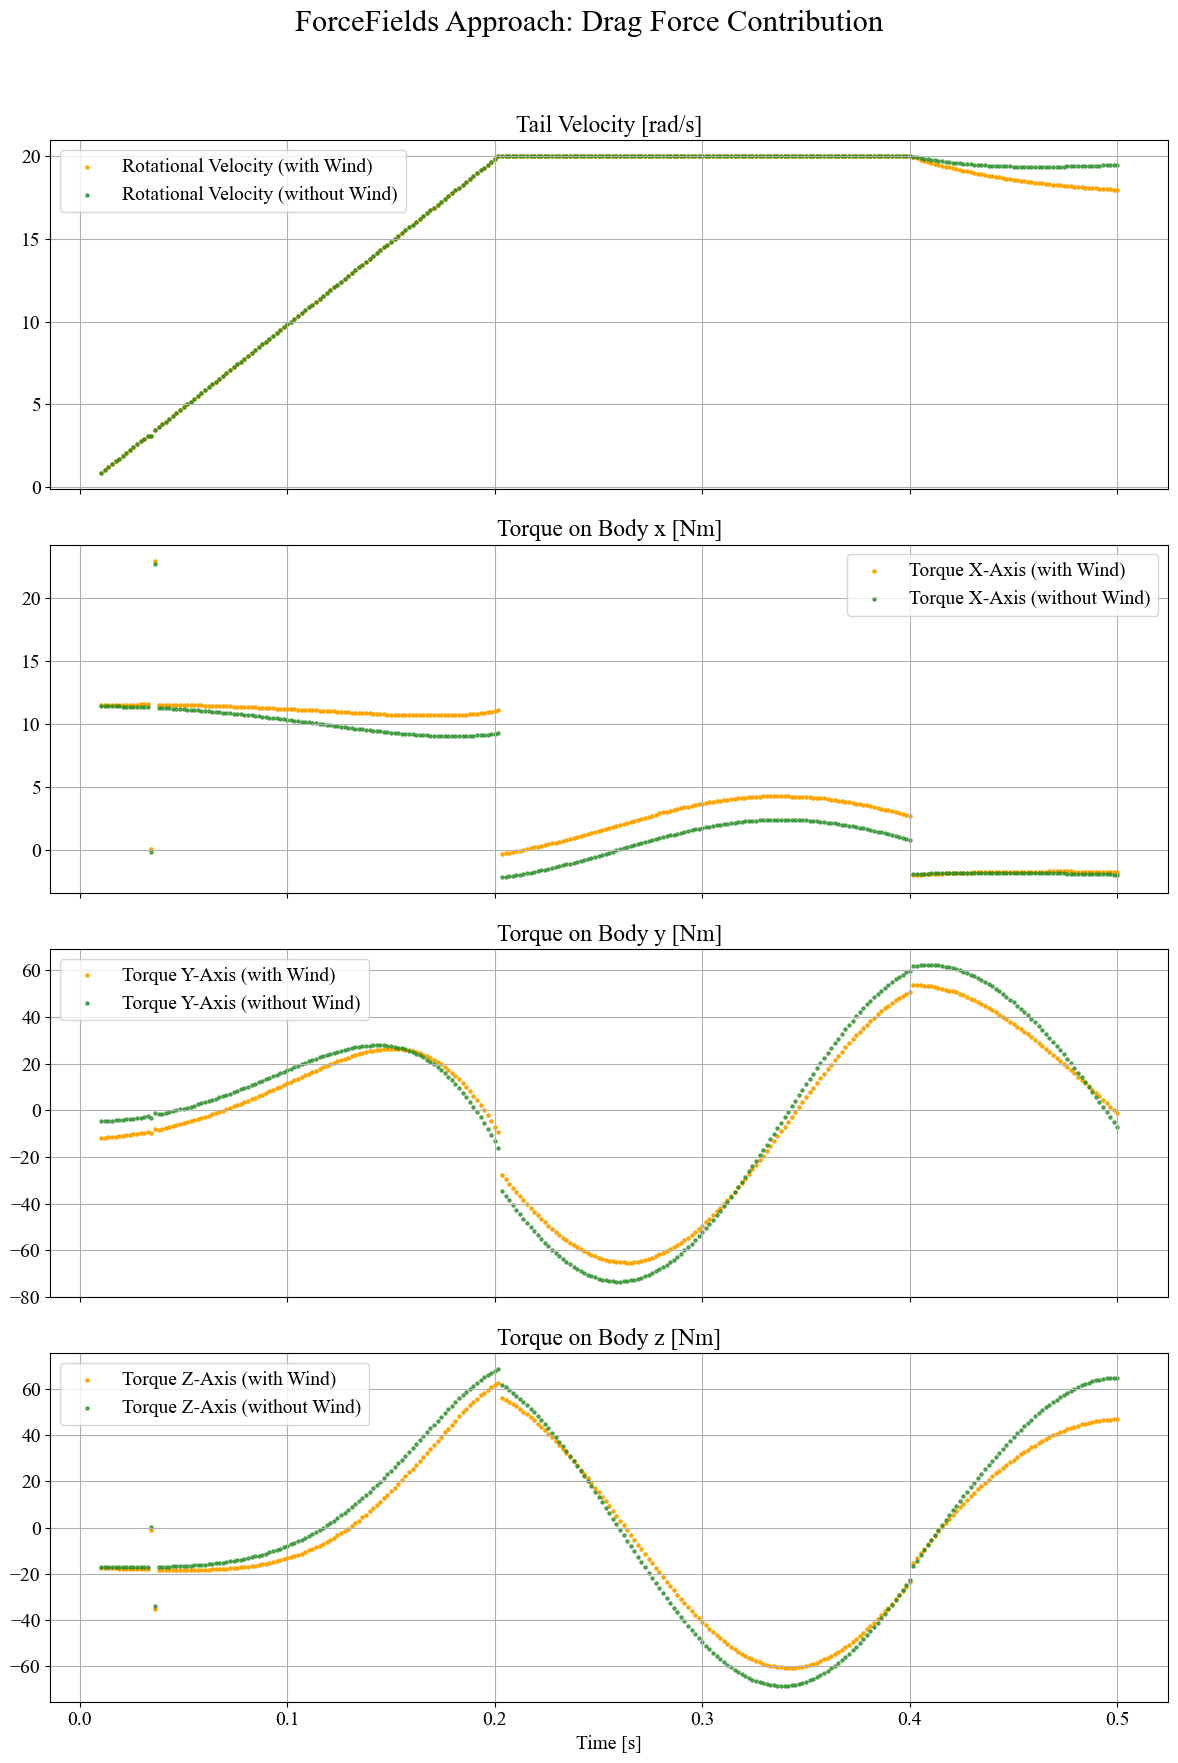

KeyError: 'Body_Root_FixedJoint_torque_x'

In [51]:


columns_to_plot = {"Tail Velocity [rad/s]": ["TailDrive_velocity"],
                    "Torque on Body x [Nm]": ["TrackDrive_torque_x"],
                    "Torque on Body y [Nm]": ["TrackDrive_torque_y"],
                    "Torque on Body z [Nm]": ["TrackDrive_torque_z"],
}
legend = {
    "Tail Velocity [rad/s]": ["Rotational Velocity", "Rotational Velocity Setpoint"],
    "Torque on Body x [Nm]": ["Torque X-Axis"],
    "Torque on Body y [Nm]": ["Torque Y-Axis"],
    "Torque on Body z [Nm]": ["Torque Z-Axis"],
}

plot_Drag_contribution(df_wForce=df_FF_wForce, df_woForce=df_FF_woForce, 
                       columns_to_plot=columns_to_plot,
                       legend=legend, suptitle="ForceFields Approach: Drag Force Contribution", time_range=(0.01, 1))
some_math_function(df_FF_wForce, df_FF_woForce)